# Data Mining Project - wqi prediction 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel("Ganga-wqi.xlsx")
data

,Station code,Name of the Monitoring Location,Unnamed: 2,State Name,Temp_MIN,Temp_MAX,DO_MIN,DO_MAX,pHMIN,pHMAX,...,BCO_MIN,BCO_MAX,N_MIN,N_MAX,FC_MIN,FC_MAX,TC_MIN,TC_MAX,FS_MIN,FS_MAX
0,1491,"BHAGIRATHI AT GANGOTRI,",NaN,UTTARAKHAND,-,-,9.8,9.8,7.10,7.10,...,1.5,1.50,0.32,0.32,2,2,2,2,2,2
1,1484,ALAKNANDA B/C MANDAKINI AT RUDRA PRAYAG,NaN,UTTARAKHAND,12,19,9.2,10.8,7.30,8.00,...,1,1.00,BDL,BDL,2,2,2,2,2,2
2,1486,ALAKNANDA A/C MANDAKINI AT RUDRAPRAYAG,NaN,UTTARAKHAND,13,20,10.0,10.8,7.40,8.00,...,1,1.00,BDL,0.35,2,2,2,2,2,2
3,1488,BHAGIRATHI B/C WITH ALAKNANDA AT DEVPRAYAG,NaN,UTTARAKHAND,14,20,8.8,11.0,7.20,8.10,...,BDL,1.00,BDL,BDL,2,2,2,2,2,2
4,1487,ALAKNANDA B/C TO BHAGIRATHI AT DEVPRAYAG,NaN,UTTARAKHAND,15,20,9.0,12.8,7.30,8.10,...,BDL,1.00,BDL,BDL,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1471,GANGA AT HOWRAH-SHIVPUR WEST BENGAL,NaN,WEST BENGAL,20,35,3.9,7.8,6.75,8.05,...,1.15,4.90,0.3,2.21,23000,130000,110000,220000,40,220
95,1470,"GANGA AT GARDEN REACH, KOLKATA, WEST BENGAL",NaN,WEST BENGAL,20,34,3.7,7.6,6.77,7.98,...,1.1,5.30,BDL,2.1,30000,140000,70000,700000,20,170
96,1052,"GANGA AT ULUBERIA , HOWRAH,WEST BENGAL",NaN,WEST BENGAL,16,33,3.9,8.2,6.78,7.98,...,1.05,3.90,0.35,2.45,8000,70000,13000,110000,20,130
97,1335,GANGA AT PATIKALI NEAR DURGA CHAK WEST BENGAL,NaN,WEST BENGAL,21,32,4.6,8.6,6.13,8.54,...,BDL,3.33,BDL,3.4,450,17000,2200,35000,110,220


In [4]:
data.isna().sum()

Station code                        0
Name of the Monitoring Location     0
Unnamed: 2                         99
State Name                          0
Temp_MIN                            0
Temp_MAX                            0
DO_MIN                              0
DO_MAX                              0
pHMIN                               0
pHMAX                               0
CondMIN                             0
CondMAX                             0
BCO_MIN                             0
BCO_MAX                             0
N_MIN                               0
N_MAX                               0
FC_MIN                              0
FC_MAX                              0
TC_MIN                              0
TC_MAX                              0
FS_MIN                              0
FS_MAX                              0
dtype: int64

In [5]:
data['Temp_MIN'].replace('-', np.nan, inplace=True) 
data['Temp_MAX'].replace('-', np.nan, inplace=True)
data['BCO_MIN'].replace('BDL', np.nan, inplace=True)
data['BCO_MAX'].replace('BDL', np.nan, inplace=True)
data['N_MIN'].replace('BDL', np.nan, inplace=True)
data['N_MAX'].replace('BDL', np.nan, inplace=True)
data['N_MIN'].replace('-', np.nan, inplace=True)
data['N_MAX'].replace('-', np.nan, inplace=True)
data['FC_MIN'].replace('-', np.nan, inplace=True)
data['FC_MAX'].replace('-', np.nan, inplace=True)
data['TC_MIN'].replace('-', np.nan, inplace=True)
data['TC_MAX'].replace('-', np.nan, inplace=True)
data['FS_MIN'].replace('-', np.nan, inplace=True)
data['FS_MAX'].replace('-', np.nan, inplace=True)
data

,Station code,Name of the Monitoring Location,Unnamed: 2,State Name,Temp_MIN,Temp_MAX,DO_MIN,DO_MAX,pHMIN,pHMAX,...,BCO_MIN,BCO_MAX,N_MIN,N_MAX,FC_MIN,FC_MAX,TC_MIN,TC_MAX,FS_MIN,FS_MAX
0,1491,"BHAGIRATHI AT GANGOTRI,",NaN,UTTARAKHAND,NaN,NaN,9.8,9.8,7.10,7.10,...,1.50,1.50,0.32,0.32,2.0,2.0,2.0,2.0,2.0,2.0
1,1484,ALAKNANDA B/C MANDAKINI AT RUDRA PRAYAG,NaN,UTTARAKHAND,12.0,19.0,9.2,10.8,7.30,8.00,...,1.00,1.00,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0
2,1486,ALAKNANDA A/C MANDAKINI AT RUDRAPRAYAG,NaN,UTTARAKHAND,13.0,20.0,10.0,10.8,7.40,8.00,...,1.00,1.00,NaN,0.35,2.0,2.0,2.0,2.0,2.0,2.0
3,1488,BHAGIRATHI B/C WITH ALAKNANDA AT DEVPRAYAG,NaN,UTTARAKHAND,14.0,20.0,8.8,11.0,7.20,8.10,...,NaN,1.00,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0
4,1487,ALAKNANDA B/C TO BHAGIRATHI AT DEVPRAYAG,NaN,UTTARAKHAND,15.0,20.0,9.0,12.8,7.30,8.10,...,NaN,1.00,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1471,GANGA AT HOWRAH-SHIVPUR WEST BENGAL,NaN,WEST BENGAL,20.0,35.0,3.9,7.8,6.75,8.05,...,1.15,4.90,0.30,2.21,23000.0,130000.0,110000.0,220000.0,40.0,220.0
95,1470,"GANGA AT GARDEN REACH, KOLKATA, WEST BENGAL",NaN,WEST BENGAL,20.0,34.0,3.7,7.6,6.77,7.98,...,1.10,5.30,NaN,2.10,30000.0,140000.0,70000.0,700000.0,20.0,170.0
96,1052,"GANGA AT ULUBERIA , HOWRAH,WEST BENGAL",NaN,WEST BENGAL,16.0,33.0,3.9,8.2,6.78,7.98,...,1.05,3.90,0.35,2.45,8000.0,70000.0,13000.0,110000.0,20.0,130.0
97,1335,GANGA AT PATIKALI NEAR DURGA CHAK WEST BENGAL,NaN,WEST BENGAL,21.0,32.0,4.6,8.6,6.13,8.54,...,NaN,3.33,NaN,3.40,450.0,17000.0,2200.0,35000.0,110.0,220.0


In [6]:
data.drop('Unnamed: 2', axis=1, inplace=True)
data.head()

,Station code,Name of the Monitoring Location,State Name,Temp_MIN,Temp_MAX,DO_MIN,DO_MAX,pHMIN,pHMAX,CondMIN,...,BCO_MIN,BCO_MAX,N_MIN,N_MAX,FC_MIN,FC_MAX,TC_MIN,TC_MAX,FS_MIN,FS_MAX
0,1491,"BHAGIRATHI AT GANGOTRI,",UTTARAKHAND,NaN,NaN,9.8,9.8,7.1,7.1,109,...,1.5,1.5,0.32,0.32,2.0,2.0,2.0,2.0,2.0,2.0
1,1484,ALAKNANDA B/C MANDAKINI AT RUDRA PRAYAG,UTTARAKHAND,12.0,19.0,9.2,10.8,7.3,8.0,173,...,1.0,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0
2,1486,ALAKNANDA A/C MANDAKINI AT RUDRAPRAYAG,UTTARAKHAND,13.0,20.0,10.0,10.8,7.4,8.0,116,...,1.0,1.0,NaN,0.35,2.0,2.0,2.0,2.0,2.0,2.0
3,1488,BHAGIRATHI B/C WITH ALAKNANDA AT DEVPRAYAG,UTTARAKHAND,14.0,20.0,8.8,11.0,7.2,8.1,78,...,NaN,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0
4,1487,ALAKNANDA B/C TO BHAGIRATHI AT DEVPRAYAG,UTTARAKHAND,15.0,20.0,9.0,12.8,7.3,8.1,87,...,NaN,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0


In [7]:
data.isna().sum()/len(data) * 100

Station code                        0.000000
Name of the Monitoring Location     0.000000
State Name                          0.000000
Temp_MIN                            4.040404
Temp_MAX                            4.040404
DO_MIN                              0.000000
DO_MAX                              0.000000
pHMIN                               0.000000
pHMAX                               0.000000
CondMIN                             0.000000
CondMAX                             0.000000
BCO_MIN                            12.121212
BCO_MAX                             0.000000
N_MIN                              89.898990
N_MAX                              24.242424
FC_MIN                              4.040404
FC_MAX                              4.040404
TC_MIN                              4.040404
TC_MAX                              4.040404
FS_MIN                              6.060606
FS_MAX                              6.060606
dtype: float64

In [8]:
data.fillna(data.mean(), inplace=True)
data.isna().sum()

C:\Users\dhruvil\AppData\Local\Temp\ipykernel_21768\352761875.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


Station code                       0
Name of the Monitoring Location    0
State Name                         0
Temp_MIN                           0
Temp_MAX                           0
DO_MIN                             0
DO_MAX                             0
pHMIN                              0
pHMAX                              0
CondMIN                            0
CondMAX                            0
BCO_MIN                            0
BCO_MAX                            0
N_MIN                              0
N_MAX                              0
FC_MIN                             0
FC_MAX                             0
TC_MIN                             0
TC_MAX                             0
FS_MIN                             0
FS_MAX                             0
dtype: int64

<AxesSubplot:>

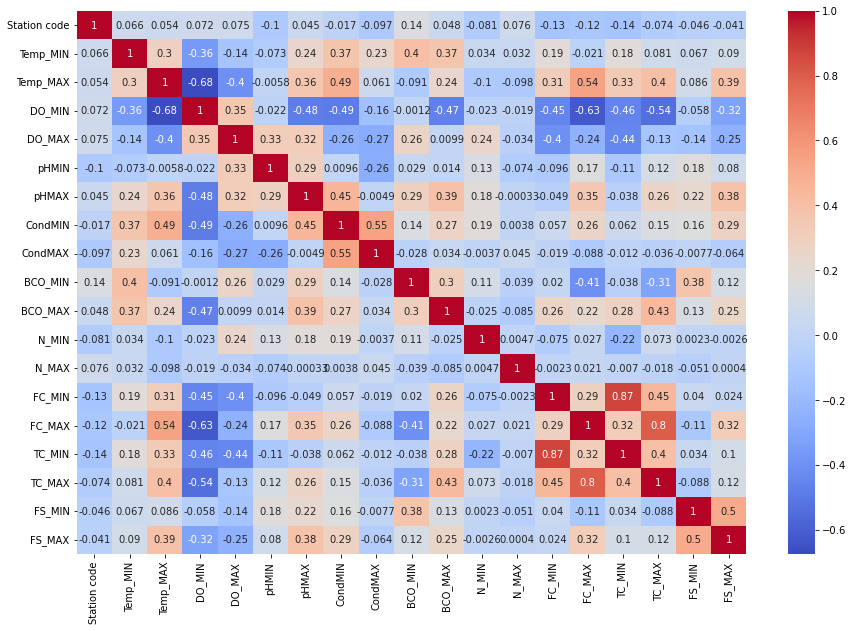

In [9]:
correlation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [10]:
data.head()

,Station code,Name of the Monitoring Location,State Name,Temp_MIN,Temp_MAX,DO_MIN,DO_MAX,pHMIN,pHMAX,CondMIN,...,BCO_MIN,BCO_MAX,N_MIN,N_MAX,FC_MIN,FC_MAX,TC_MIN,TC_MAX,FS_MIN,FS_MAX
0,1491,"BHAGIRATHI AT GANGOTRI,",UTTARAKHAND,17.105263,30.626316,9.8,9.8,7.1,7.1,109,...,1.500000,1.5,0.320,0.320000,2.0,2.0,2.0,2.0,2.0,2.0
1,1484,ALAKNANDA B/C MANDAKINI AT RUDRA PRAYAG,UTTARAKHAND,12.000000,19.000000,9.2,10.8,7.3,8.0,173,...,1.000000,1.0,0.345,1.714133,2.0,2.0,2.0,2.0,2.0,2.0
2,1486,ALAKNANDA A/C MANDAKINI AT RUDRAPRAYAG,UTTARAKHAND,13.000000,20.000000,10.0,10.8,7.4,8.0,116,...,1.000000,1.0,0.345,0.350000,2.0,2.0,2.0,2.0,2.0,2.0
3,1488,BHAGIRATHI B/C WITH ALAKNANDA AT DEVPRAYAG,UTTARAKHAND,14.000000,20.000000,8.8,11.0,7.2,8.1,78,...,1.672989,1.0,0.345,1.714133,2.0,2.0,2.0,2.0,2.0,2.0
4,1487,ALAKNANDA B/C TO BHAGIRATHI AT DEVPRAYAG,UTTARAKHAND,15.000000,20.000000,9.0,12.8,7.3,8.1,87,...,1.672989,1.0,0.345,1.714133,2.0,2.0,2.0,2.0,2.0,2.0


In [11]:
from numpy import mean
data['Temperature(C)'] = (data['Temp_MIN'] + data['Temp_MAX']) / 2
data['Dissolved Oxygen (mg/ L)'] = (data['DO_MIN'] + data['DO_MAX'])/2
data['pH'] = (data['pHMIN'] + data['pHMAX'])/2
data['Conductivity (µmhos/cm)'] = (data['CondMIN']+ data['CondMAX'])/2
data['BCO (mg/ L)'] = (data['BCO_MIN']+ data['BCO_MAX'])/2
data['Nitrates(mg/l)'] = (data['N_MIN']+ data['N_MAX'])/2
# data['Fecal Coliform(mg/l)'] = (data['FS_MIN']+ data['FS_MAX'])/2
data['Total Coliform(mg/l)'] = (data['TC_MIN'] + data['TC_MAX'])/2
data['Fecal Coliform (MPN/ 100 mL)'] = (data['FC_MIN']+ data['FC_MAX'])/2
data['Fecal Streptococci(mg/l)'] = (data['FS_MIN'] + data['FS_MAX'])/2
data.drop(['Temp_MIN', 'Temp_MAX', 'DO_MIN', 'DO_MAX', 'pHMIN', 'pHMAX', 'CondMIN', 'CondMAX', 'BCO_MIN', 'BCO_MAX', 'N_MIN', 'N_MAX', 'FS_MIN', 'FS_MAX', 'TC_MIN', 'TC_MAX', 'FC_MIN', 'FC_MAX'], axis=1, inplace=True)
data.head()

,Station code,Name of the Monitoring Location,State Name,Temperature(C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),Fecal Coliform (MPN/ 100 mL),Fecal Streptococci(mg/l)
0,1491,"BHAGIRATHI AT GANGOTRI,",UTTARAKHAND,23.865789,9.8,7.10,109.0,1.500000,0.320000,2.0,2.0,2.0
1,1484,ALAKNANDA B/C MANDAKINI AT RUDRA PRAYAG,UTTARAKHAND,15.500000,10.0,7.65,238.0,1.000000,1.029567,2.0,2.0,2.0
2,1486,ALAKNANDA A/C MANDAKINI AT RUDRAPRAYAG,UTTARAKHAND,16.500000,10.4,7.70,200.0,1.000000,0.347500,2.0,2.0,2.0
3,1488,BHAGIRATHI B/C WITH ALAKNANDA AT DEVPRAYAG,UTTARAKHAND,17.000000,9.9,7.65,137.5,1.336494,1.029567,2.0,2.0,2.0
4,1487,ALAKNANDA B/C TO BHAGIRATHI AT DEVPRAYAG,UTTARAKHAND,17.500000,10.9,7.70,155.0,1.336494,1.029567,2.0,2.0,2.0


In [12]:
data.columns
print(data.shape)

(99, 12)


# Next TASK is to find  Water Quality Index (WQI) for each parameter and then find the overall WQI for the water body.

### WQI = 100 - (100 * (Parameter Value - Minimum Value) / (Maximum Value - Minimum Value))

In [13]:
data.describe()

,Station code,Temperature(C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),Fecal Coliform (MPN/ 100 mL),Fecal Streptococci(mg/l)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,5332.666667,23.865789,8.267172,7.833636,408.282828,2.487656,1.029567,64622.252632,40231.536842,1336.768817
std,6304.226011,2.683113,1.144868,0.352827,641.367660,0.976815,1.982948,86028.804325,41262.576852,2029.805719
min,1046.000000,15.500000,4.400000,5.900000,109.000000,1.000000,0.320000,2.000000,2.000000,2.000000
25%,1469.500000,23.000000,7.600000,7.700000,277.250000,1.775000,0.453750,3075.000000,1732.500000,15.500000
50%,2551.000000,24.500000,8.150000,7.850000,316.000000,2.200000,0.662500,47950.000000,18350.000000,389.000000
75%,10134.500000,25.500000,9.100000,8.050000,378.250000,3.112500,1.029567,83725.000000,80775.000000,1751.000000
max,30076.000000,28.500000,10.900000,8.360000,6273.000000,5.736494,19.672500,456500.000000,179000.000000,10000.000000


In [14]:
#chcecking outliers

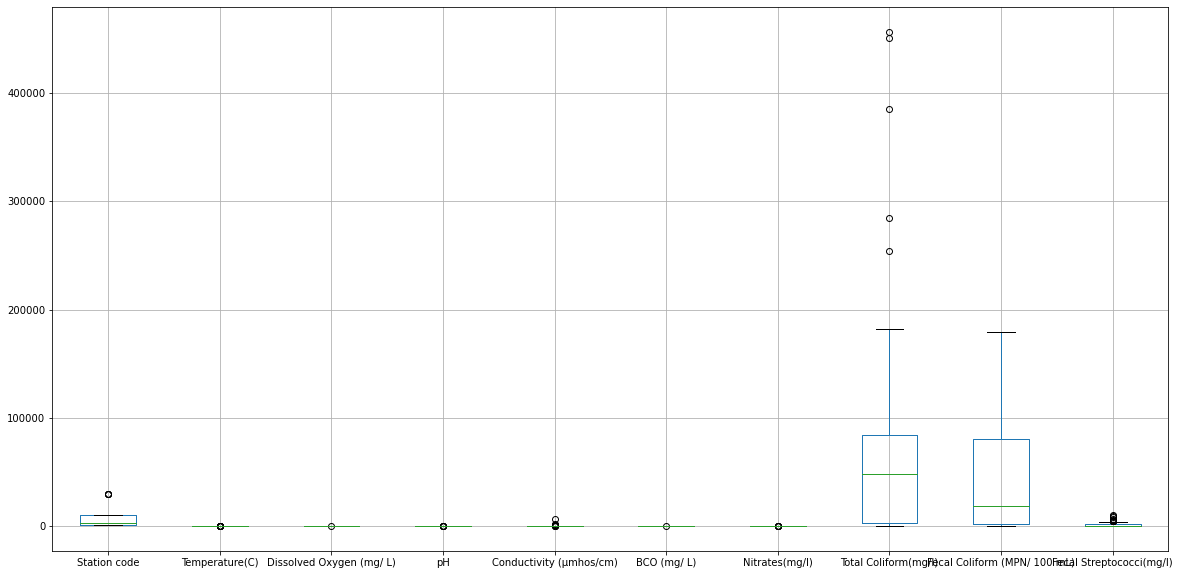

In [15]:
data.boxplot(figsize=(20,10))
plt.show()

In [16]:
data['Total Coliform(mg/l)'].describe()

count        99.000000
mean      64622.252632
std       86028.804325
min           2.000000
25%        3075.000000
50%       47950.000000
75%       83725.000000
max      456500.000000
Name: Total Coliform(mg/l), dtype: float64

In [17]:
#not removing outliers from the feature 'total coliform' because they are important for the wqi predction

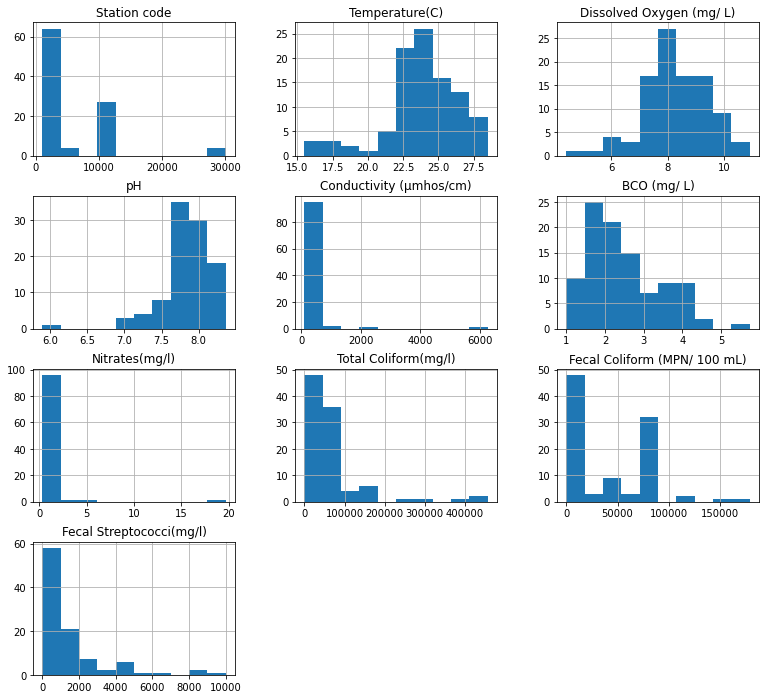

In [18]:
data.hist(figsize=(13,12))
plt.show() 

q = value of the feature 

std = standard value of the feature from WHO

w = relative weightage of that feature in determining water quality index 

In [19]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['Temperature(C)']
x = wqi_subindex(a , 0.0386 , 25)
data['subindex_Temp'] = x

In [20]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['Dissolved Oxygen (mg/ L)']
x = wqi_subindex(a , 0.193 , 5)
data['subindex_DO'] = x

In [21]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['pH']
x = wqi_subindex(a ,  0.1286, 7.5)
data['subindex_pH'] = x

In [22]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['Conductivity (µmhos/cm)']
x = wqi_subindex(a ,  0.00064, 1500)
data['subindex_EC'] = x

In [23]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['BCO (mg/ L)']
x = wqi_subindex(a , 0.193, 5)
data['subindex_BCO'] = x

In [24]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['Nitrates(mg/l)']
x = wqi_subindex(a , 0.214 , 45)
data['subindex_Nitrates'] = x

In [25]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['Total Coliform(mg/l)']
x = wqi_subindex(a ,  0.0965,10)
data['subindex_TC'] = x

In [26]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['Fecal Coliform (MPN/ 100 mL)']
x = wqi_subindex(a ,  0.0193, 50)
data['subindex_FC'] = x

In [27]:
def wqi_subindex(q,w,std) :
    rel_w = w/0.91574
    wqi = rel_w * (q/std) * 100
    return wqi

a= data['Fecal Streptococci(mg/l)']
x = wqi_subindex(a , 0.0321, 30)
data['subindex_FS'] = x

In [28]:
data.head()

,Station code,Name of the Monitoring Location,State Name,Temperature(C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),...,Fecal Streptococci(mg/l),subindex_Temp,subindex_DO,subindex_pH,subindex_EC,subindex_BCO,subindex_Nitrates,subindex_TC,subindex_FC,subindex_FS
0,1491,"BHAGIRATHI AT GANGOTRI,",UTTARAKHAND,23.865789,9.8,7.10,109.0,1.500000,0.320000,2.0,...,2.0,4.023935,41.308668,13.294312,0.005079,6.322755,0.166180,2.107585,0.084303,0.233691
1,1484,ALAKNANDA B/C MANDAKINI AT RUDRA PRAYAG,UTTARAKHAND,15.500000,10.0,7.65,238.0,1.000000,1.029567,2.0,...,2.0,2.613406,42.151702,14.324153,0.011089,4.215170,0.534667,2.107585,0.084303,0.233691
2,1486,ALAKNANDA A/C MANDAKINI AT RUDRAPRAYAG,UTTARAKHAND,16.500000,10.4,7.70,200.0,1.000000,0.347500,2.0,...,2.0,2.782012,43.837771,14.417775,0.009319,4.215170,0.180461,2.107585,0.084303,0.233691
3,1488,BHAGIRATHI B/C WITH ALAKNANDA AT DEVPRAYAG,UTTARAKHAND,17.000000,9.9,7.65,137.5,1.336494,1.029567,2.0,...,2.0,2.866316,41.730185,14.324153,0.006406,5.633551,0.534667,2.107585,0.084303,0.233691
4,1487,ALAKNANDA B/C TO BHAGIRATHI AT DEVPRAYAG,UTTARAKHAND,17.500000,10.9,7.70,155.0,1.336494,1.029567,2.0,...,2.0,2.950619,45.945356,14.417775,0.007222,5.633551,0.534667,2.107585,0.084303,0.233691


In [29]:
z = data.iloc[:,12:]
z

,subindex_Temp,subindex_DO,subindex_pH,subindex_EC,subindex_BCO,subindex_Nitrates,subindex_TC,subindex_FC,subindex_FS
0,4.023935,41.308668,13.294312,0.005079,6.322755,0.166180,2.107585,0.084303,0.233691
1,2.613406,42.151702,14.324153,0.011089,4.215170,0.534667,2.107585,0.084303,0.233691
2,2.782012,43.837771,14.417775,0.009319,4.215170,0.180461,2.107585,0.084303,0.233691
3,2.866316,41.730185,14.324153,0.006406,5.633551,0.534667,2.107585,0.084303,0.233691
4,2.950619,45.945356,14.417775,0.007222,5.633551,0.534667,2.107585,0.084303,0.233691
...,...,...,...,...,...,...,...,...,...
94,4.636687,24.658746,13.856044,0.021666,12.750890,0.651738,173875.772599,3224.605237,15.189901
95,4.552384,23.815712,13.809233,0.017845,13.488545,0.634860,405710.136065,3582.894708,11.100312
96,4.130867,25.501780,13.818595,0.019895,10.432546,0.727038,64808.242514,1643.916395,8.763404
97,4.468080,27.820124,13.734335,0.292275,10.544224,0.972413,19600.541638,367.773604,19.279490


In [30]:
WQI = z.sum(axis=1)
data['WQI'] = WQI
data.drop(['subindex_Temp','subindex_DO','subindex_pH','subindex_EC','subindex_BCO','subindex_Nitrates','subindex_TC','subindex_FC','subindex_FS'], axis=1 , inplace=True)
data

,Station code,Name of the Monitoring Location,State Name,Temperature(C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),Fecal Coliform (MPN/ 100 mL),Fecal Streptococci(mg/l),WQI
0,1491,"BHAGIRATHI AT GANGOTRI,",UTTARAKHAND,23.865789,9.80,7.100,109.0,1.500000,0.320000,2.0,2.0,2.0,67.546508
1,1484,ALAKNANDA B/C MANDAKINI AT RUDRA PRAYAG,UTTARAKHAND,15.500000,10.00,7.650,238.0,1.000000,1.029567,2.0,2.0,2.0,66.275767
2,1486,ALAKNANDA A/C MANDAKINI AT RUDRAPRAYAG,UTTARAKHAND,16.500000,10.40,7.700,200.0,1.000000,0.347500,2.0,2.0,2.0,67.868087
3,1488,BHAGIRATHI B/C WITH ALAKNANDA AT DEVPRAYAG,UTTARAKHAND,17.000000,9.90,7.650,137.5,1.336494,1.029567,2.0,2.0,2.0,67.520858
4,1487,ALAKNANDA B/C TO BHAGIRATHI AT DEVPRAYAG,UTTARAKHAND,17.500000,10.90,7.700,155.0,1.336494,1.029567,2.0,2.0,2.0,71.914769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1471,GANGA AT HOWRAH-SHIVPUR WEST BENGAL,WEST BENGAL,27.500000,5.85,7.400,465.0,3.025000,1.255000,165000.0,76500.0,130.0,177172.143507
95,1470,"GANGA AT GARDEN REACH, KOLKATA, WEST BENGAL",WEST BENGAL,27.000000,5.65,7.375,383.0,3.200000,1.222500,385000.0,85000.0,95.0,409360.449663
96,1052,"GANGA AT ULUBERIA , HOWRAH,WEST BENGAL",WEST BENGAL,24.500000,6.05,7.380,427.0,2.475000,1.400000,61500.0,39000.0,75.0,66515.553035
97,1335,GANGA AT PATIKALI NEAR DURGA CHAK WEST BENGAL,WEST BENGAL,26.500000,6.60,7.335,6273.0,2.501494,1.872500,18600.0,8725.0,165.0,20045.426184


In [31]:
WQI.to_excel('beta.xlsx')

In [33]:
data['WQI'].describe()

count        99.000000
mean      70015.051214
std       92100.289321
min          66.262768
25%        3501.345203
50%       52629.296998
75%       91127.001700
max      488841.888960
Name: WQI, dtype: float64